## Лабораторная работа № 5. Парная линейная регрессия
### (Валяев Георгий, ПИ20-6)

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Задания для выполнения

##### 1. Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысла).
##### Можно взять не очень актуальные, но готовые данные в приложении (папка data).

In [52]:
sber_data = pd.read_csv("data/SBER_101001_171001.txt")
mvid_data = pd.read_csv("data/MVID_101001_171001.txt")
sber_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [53]:
mvid_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [54]:
res_data = pd.merge(sber_data, mvid_data, on="<DATE>")
res_data

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248
...,...,...,...,...,...,...,...,...,...,...,...
1753,SBER,D,20170926,0,192.54,82022480,MVID,D,0,425.00,73570
1754,SBER,D,20170927,0,193.70,54969700,MVID,D,0,424.10,77680
1755,SBER,D,20170928,0,191.96,39061930,MVID,D,0,423.10,75540
1756,SBER,D,20170929,0,192.33,26264260,MVID,D,0,416.10,90430


Далее выделим из получившегося объединенного датасета результативный и факторный признак. В нашем случае это будут цены закрытия двух этих инструментов:

In [55]:
x = res_data['<CLOSE>_x']
y = res_data['<CLOSE>_y']

### Котировки SBER & MVID

Для визуального представления совместного распределения значений используемых переменных построим график зависимости одной переменной от другой:

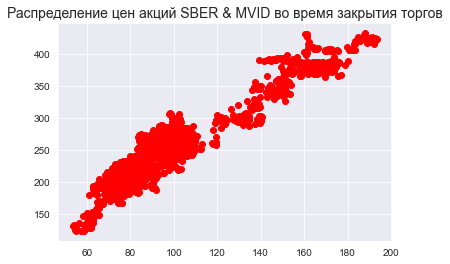

In [56]:
plt.figure()
plt.scatter(x, y, color='red')
plt.title("Распределение цен акций SBER & MVID во время закрытия торгов", fontsize=14)
plt.show()

##### 2. Построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [57]:
class Hypothes_model(object):

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    # метод нахождения теоретического значения выходной переменной как прямое действие регрессии
    def predict(self, x):
        return self.b0 + self.b1 * x

    # метод функции ошибки для регрессии
    def error_func(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    # метод градиентного спуска
    def BGD(self, X, Y):
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1


In [58]:
hyp = Hypothes_model()
print(hyp.predict(0))
print(hyp.predict(100))

0
0


In [59]:
J = hyp.error_func(x, y)
print("Initial error:", J)

Initial error: 36271.58344889084


Как мы видим, для начала оба параметра регрессии равны нулю. Конечно, такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения мы постепенно его улучшаем и приходим к оптимальному решению.

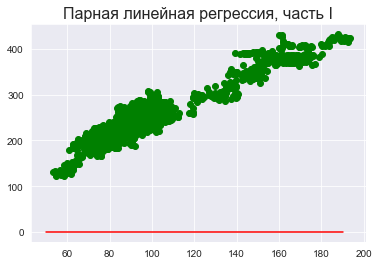

In [60]:
X0 = np.linspace(50, 190, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.title("Парная линейная регрессия, часть I", fontsize=16)
plt.scatter(x, y, color='green')
plt.plot(X0, Y0, 'r')
plt.show()

Теперь все готово к запуску градиентного спуска.

In [61]:
hyp.BGD(x, y)
J = hyp.error_func(x, y)
print("Error after gradient descent:", J)

Error after gradient descent: 6734.135540194945


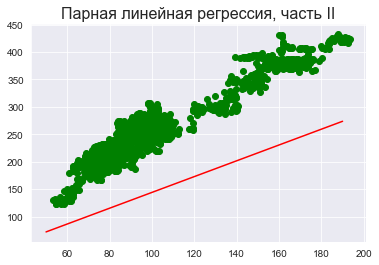

In [62]:
X0 = np.linspace(50, 190, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.title("Парная линейная регрессия, часть II", fontsize=16)
plt.scatter(x, y, color='green')
plt.plot(X0, Y0, 'r')
plt.show()

Как мы видим, численное значение ошибки значительно уменьшилось. Да и линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска. Модифицируем метод так, чтобы он запускался в цикле пока ошибка не перестанет меняться существенно:

#### Переопределение метода BGD

In [87]:
class Hypothes_model(object):

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    # метод нахождения теоретического значения выходной переменной как прямое действие регрессии
    def predict(self, x, is_transform=False):
        if is_transform:
            return 2400 + self.b0 - self.b1 * x
        else:
            return self.b0 + self.b1 * x

    # метод функции ошибки для регрессии
    def error_func(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    # метод градиентного спуска
    def BGD_new(self, X, Y, alpha = 0.000005, accuracy=0.01, max_steps=5000):
        # Входные локальные переменные метода
        steps, errors, step, dJ = [], [], 0, 1

        # Ошибки
        old_err, new_err = self.error_func(X, Y), self.error_func(X, Y) - 1

        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            # Новая ошибка становится старой
            old_err = new_err
            new_err = self.error_func(X, Y)

            # Обновляем флаг выхода из цикла
            dJ = abs(old_err - new_err)

            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Теперь метод градиентного спуска возвращает дополнительно массив ошибок на каждой итерации спуска и номер итерации. Это будет полезно для дальнейшего построения кривых обучения.

##### 3. Оценить на графике качество построенной модели.

In [64]:
hyp = Hypothes_model()
steps, errors = hyp.BGD_new(x, y)
J = hyp.error_func(x, y)
print("Error after gradient descent:", J)

Error after gradient descent: 298.76881676471504


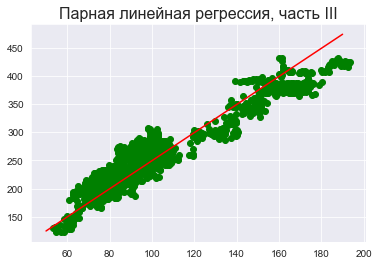

In [65]:
X0 = np.linspace(50, 190, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.title("Парная линейная регрессия, часть III", fontsize=16)
plt.scatter(x, y, color='green')
plt.plot(X0, Y0, 'r')
plt.show()

##### 4. Построить кривые обучения.

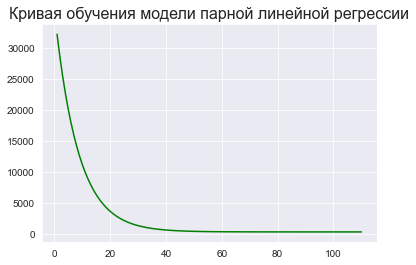

In [66]:
plt.figure()
plt.title("Кривая обучения модели парной линейной регрессии", fontsize=16)
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

### Дополнительные задания

##### 1. Постройте модель регрессии на другой паре инструментов.

### Котировки GAZP & YNDX

In [67]:
gazp_data = pd.read_csv("data/GAZP_101001_171001.txt")
yndx_data = pd.read_csv("data/YNDX_101001_171001.txt")
gazp_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20101001,0,160.54,60923751
1,GAZP,D,20101004,0,161.99,61902787
2,GAZP,D,20101005,0,162.44,61546943
3,GAZP,D,20101006,0,163.00,67921495
4,GAZP,D,20101007,0,162.49,43529081


In [68]:
yndx_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,YNDX,D,20140604,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207


##### Проверка данных на наличие NaN

In [69]:
gazp_data.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [70]:
yndx_data.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

##### Объединение таблиц по дате торгов акций

In [71]:
data = gazp_data.merge(yndx_data, on="<DATE>")
data

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20140604,0,144.04,39187300,YNDX,D,0,1170.0,35146
1,GAZP,D,20140605,0,142.75,42423090,YNDX,D,0,1145.1,24973
2,GAZP,D,20140606,0,143.97,47837310,YNDX,D,0,1163.0,7889
3,GAZP,D,20140609,0,144.40,40341240,YNDX,D,0,1172.1,7304
4,GAZP,D,20140610,0,144.75,41449960,YNDX,D,0,1170.0,3207
...,...,...,...,...,...,...,...,...,...,...,...
833,GAZP,D,20170926,0,123.03,25695940,YNDX,D,0,1848.0,78559
834,GAZP,D,20170927,0,123.36,22485510,YNDX,D,0,1867.0,45351
835,GAZP,D,20170928,0,122.50,22610060,YNDX,D,0,1856.5,69221
836,GAZP,D,20170929,0,122.20,17182380,YNDX,D,0,1873.0,32277


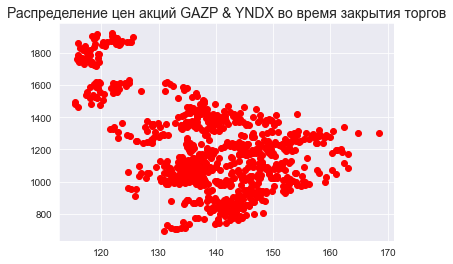

In [94]:
x, y = data["<CLOSE>_x"], data["<CLOSE>_y"]
plt.figure()
plt.title("Распределение цен акций GAZP & YNDX во время закрытия торгов", fontsize=14)
plt.scatter(x, y, color='red')
plt.show()

In [88]:
new_hyp = Hypothes_model()
steps, errors = new_hyp.BGD_new(x, y)
print("Error after gradient descent:", new_hyp.error_func(x, y))

Error after gradient descent: 50816.1542512413


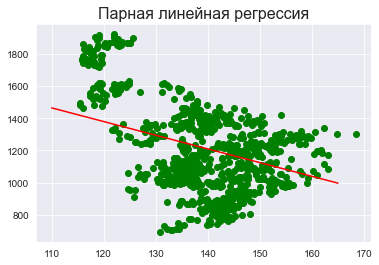

In [89]:
X01 = np.linspace(110, 165, 55)
Y01 = new_hyp.predict(X01, True)
plt.figure()
plt.title("Парная линейная регрессия", fontsize=16)
plt.scatter(x, y, color='green')
plt.plot(X01, Y01, 'r')
plt.show()

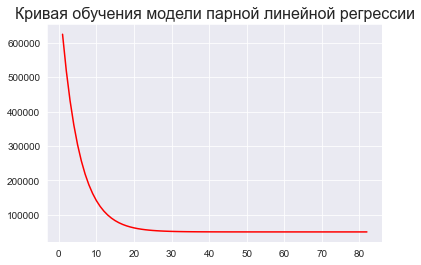

In [48]:
plt.figure()
plt.title("Кривая обучения модели парной линейной регрессии", fontsize=16)
plt.plot(steps, errors, "r")
plt.show()

##### 2. Научиться использовать библиотеку sklearn для построения парной линейной регрессии.

In [98]:
X_train, Y_train = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [100]:
linear = LinearRegression().fit(X_train, Y_train)
print("Построение модели регрессии на кодировках GAZP & YNDX...")
print("Коэффициент корреляции 2 инструментов: ", end='')
print(linear.score(X_train, Y_train))

Построение модели регрессии на кодировках GAZP & YNDX...
Коэффициент корреляции 2 инструментов: 0.24092152512857645


In [101]:
print("Коэффициенты модели парной линейной регрессии:")
print(f"b0: {linear.coef_[0][0]}\nb1: {linear.intercept_[0]}")

Коэффициенты модели парной линейной регрессии:
b0: -12.757166574188725
b1: 2973.537856501171


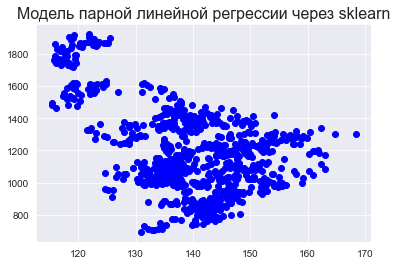

In [109]:
plt.figure()
plt.title("Модель парной линейной регрессии через sklearn", fontsize=16)
plt.scatter(X_train, Y_train, color='blue')
plt.show()